<a href="https://colab.research.google.com/github/rakeshrocky58008/pytorch/blob/main/Section_NNclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NN learning classification


from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)
len(X) , len(y)




(1000, 1000)

In [ ]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
#make a dataframe
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


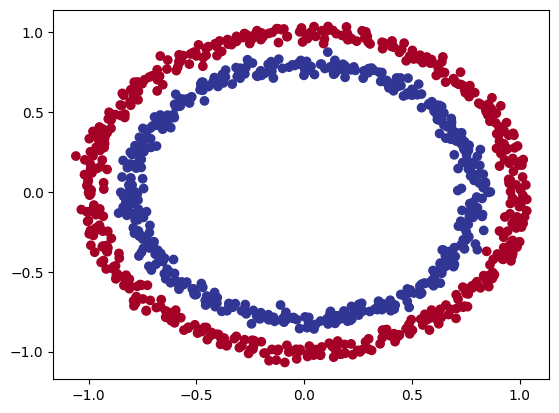

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
import torch
torch.__version__

'2.8.0+cu126'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(y_train), len(X_test),len(y_test)


(800, 800, 200, 200)

In [ ]:
#1. device agnostice code whill run on gpu if its one
#2. construct model (by subcasing nn module)
#3. define loss function & optimizer
#4. train & test loop

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
# now we setup device agnostic code
#1. subclass nn module

In [ ]:
#2. nn.Linear() layers that are capble of handling the shapes of our data
#3 defines forward method that outlines the forward pass
#4 Instatiate an instance class & send it to target device

In [ ]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=5) # more features to lear patterns on data
        self.layer_2 = nn.Linear(in_features=5,out_features=1)

    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x-> layer1 -> layer2 -> output

In [ ]:
# instanatiate instanceof model class * send it to target

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177]])),
             ('layer_1.bias',
              tensor([-0.2296,  0.4370,  0.1102,  0.5713,  0.0773])),
             ('layer_2.weight',
              tensor([[-0.1410,  0.1202, -0.1213,  0.1882,  0.3993]])),
             ('layer_2.bias', tensor([0.2585]))])

In [ ]:
# nn,Sequential replicate

model1_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

In [ ]:
model1_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037]])),
             ('0.bias', tensor([ 0.2929,  0.2236, -0.0123,  0.5534, -0.5024])),
             ('1.weight',
              tensor([[ 0.0282, -0.3052,  0.1379, -0.1540,  0.1370]])),
             ('1.bias', tensor([-0.0932]))])

In [ ]:
model1_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model1_0(X_test.to(device))

In [ ]:
print(f"Length od predections: {len(untrained_preds)}")
print(f"Shape of predections: {untrained_preds.shape}")
print(f"Device of predections: {untrained_preds.device}")
print(untrained_preds[:10])

Length od predections: 200
Shape of predections: torch.Size([200, 1])
Device of predections: cpu
tensor([[-0.3713],
        [-0.3886],
        [-0.2932],
        [-0.3936],
        [-0.2411],
        [-0.2521],
        [-0.3420],
        [-0.3099],
        [-0.2955],
        [-0.3892]], grad_fn=<SliceBackward0>)


In [ ]:
print(f"lenght od test samples: {X_test[:10]}")
print(f"First 10 labels: {y_test[:10]}")

lenght od test samples: tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#which loss function to use

# for regression. u want MSE or MSE
# for classification binaryCrossEntropy or catageorical cross entropy

In [ ]:
# for optimizers two most used orSGB or Adam

# for loss function we are going to use torch.nn.BECWithLogitsLoss()

# for diff optimizers see torch.optim

#bCE loss require inputto gothrough sigmoid from calling BCELoss
loss_fn  = nn.BCEWithLogitsLoss() # BCEwithlogitsLoss


optimizer = torch.optim.SGD(model1_0.parameters(),lr=0.1)

In [ ]:
model1_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037]])),
             ('0.bias', tensor([ 0.2929,  0.2236, -0.0123,  0.5534, -0.5024])),
             ('1.weight',
              tensor([[ 0.0282, -0.3052,  0.1379, -0.1540,  0.1370]])),
             ('1.bias', tensor([-0.0932]))])

In [ ]:
#calculate Accuracy

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

Going from raw logits -> predections prob -> predection labels


convert logitd into predeyion prob by passing them to act functions  


pred prob to pred labels using argmax

In [ ]:
model1_0.eval()
with torch.inference_mode():
    y_logits = model1_0(X_train.to(device))[:5]
y_logits

tensor([[-0.2605],
        [-0.2385],
        [-0.3136],
        [-0.3045],
        [-0.3779]])

use sigmoid on logits

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

y_preds= torch.round(y_pred_probs)

y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:

## 3.; trainign
torch.cuda.manual_seed(42)
epochs = 1000


for epoch in range(epochs):
    model1_0.train()
    X_train = X_train.to(device).squeeze()
    y_logits = model1_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train.to(device))
    acc = accuracy_fn(y_train.to(device),y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model1_0.eval()
    with torch.inference_mode():
        test_logits = model1_0(X_test.to(device)).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test.to(device))
    test_acc = accuracy_fn(y_test.to(device),test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc:.2f} | Test Loss: {test_loss} | Test Acc: {test_acc}")

Epoch: 0 | Loss: 0.7056958079338074 | Accuracy: 50.00 | Test Loss: 0.7031002640724182 | Test Acc: 50.0
Epoch: 10 | Loss: 0.6987158060073853 | Accuracy: 50.00 | Test Loss: 0.6964220404624939 | Test Acc: 50.0
Epoch: 20 | Loss: 0.6958902478218079 | Accuracy: 50.00 | Test Loss: 0.693815290927887 | Test Acc: 50.0
Epoch: 30 | Loss: 0.6946467757225037 | Accuracy: 50.00 | Test Loss: 0.6928258538246155 | Test Acc: 50.0
Epoch: 40 | Loss: 0.6940394639968872 | Accuracy: 50.00 | Test Loss: 0.6925097703933716 | Test Acc: 50.0
Epoch: 50 | Loss: 0.6937060356140137 | Accuracy: 45.38 | Test Loss: 0.6924837231636047 | Test Acc: 48.0
Epoch: 60 | Loss: 0.6935018301010132 | Accuracy: 43.38 | Test Loss: 0.6925845146179199 | Test Acc: 45.5
Epoch: 70 | Loss: 0.6933653950691223 | Accuracy: 46.75 | Test Loss: 0.6927384734153748 | Test Acc: 48.5
Epoch: 80 | Loss: 0.6932689547538757 | Accuracy: 50.00 | Test Loss: 0.69291090965271 | Test Acc: 50.0
Epoch: 90 | Loss: 0.6931984424591064 | Accuracy: 50.00 | Test Loss: 

In [ ]:
# 4 . make predections

#From the matrix , our model isnt learning anything
# lets make predections and make visual
# import function plot_decision_boundary()

import requests

from pathlib import Path

# download helper functions


if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)



helper_functions.py already exists


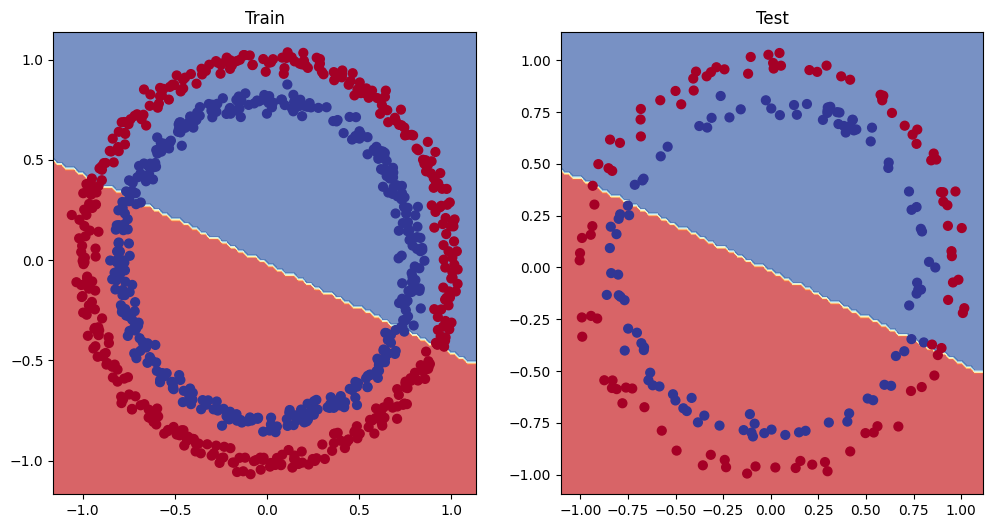

In [ ]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1_0,X_test,y_test)

#New model with more layers

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model1_1 = CircleModelV1().to(device)

In [ ]:
model1_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model1_1.parameters(),lr=0.01)

In [ ]:
torch.cuda.manual_seed(42)

epochs = 1000

X_train = X_train.to(device).squeeze()
y_train = y_train.to(device).squeeze()
X_test = X_test.to(device).squeeze()
y_test = y_test.to(device).squeeze()

for epoch in range(epochs):
  model1_1.train()
  X_train = X_train.to(device).squeeze()
  train_logits = model1_1(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  train_loss = loss_fn(train_logits,y_train.to(device))
  acc = accuracy_fn(y_train.to(device),train_preds)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  model1_1.eval()
  with torch.inference_mode():
    test_logits = model1_1(X_test.to(device)).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test.to(device))
    test_acc = accuracy_fn(y_test.to(device),test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc:.2f} | Test Loss: {test_loss} | Test Acc: {test_acc}")


Epoch: 0 | Loss: 0.6929798722267151 | Accuracy: 50.00 | Test Loss: 0.6951414346694946 | Test Acc: 47.5
Epoch: 100 | Loss: 0.6929798722267151 | Accuracy: 51.38 | Test Loss: 0.694668710231781 | Test Acc: 45.5
Epoch: 200 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 300 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 400 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 500 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 600 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 700 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 800 | Loss: 0.6929798722267151 | Accuracy: 51.00 | Test Loss: 0.6946795582771301 | Test Acc: 46.0
Epoch: 900 | Loss: 0.6929798722267151 | Accuracy: 51.00 | 

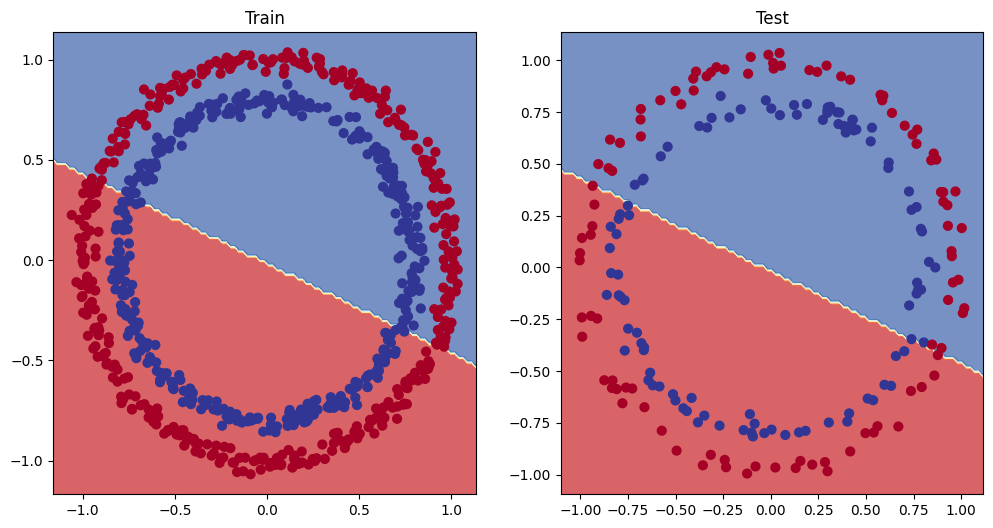

In [ ]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1_1,X_test,y_test)

In [ ]:
#preparing data to see if model fits straight line

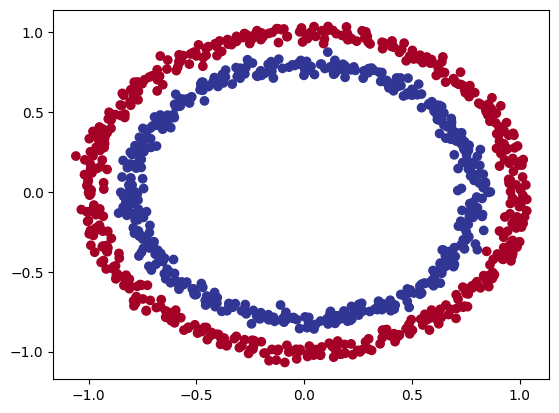

In [ ]:
## recreating non linearity

## make & plot data


import matplotlib.pyplot as plt

from sklearn.datasets import  make_circles

n = 1000


X,y = make_circles(n,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#conver data to tesnsors

import torch
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import torch.nn as nn
class CircleModuleV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()


  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
model2 = CircleModuleV2().to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(),lr=0.01)

In [ ]:
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs = 1000

X_train = X_train.to(device).squeeze()
y_train = y_train.to(device).squeeze()
X_test = X_test.to(device).squeeze()
y_test = y_test.to(device).squeeze()

for epoch in range(epochs):
  model2.train()
  train_logits = model2(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits)) # logits -> pred prob -> pred labels

  train_loss = loss_fn(train_logits,y_train.to(device))
  train_acc = accuracy(y_train.to(device),train_preds)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test.to(device)).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test.to(device))
    test_acc = accuracy(y_test.to(device),test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss} | Accuracy: {train_acc:.2f} | Test Loss: {test_loss} | Test Acc: {test_acc}")



Epoch: 0 | Loss: 0.7046765685081482 | Accuracy: 50.00 | Test Loss: 0.7017853260040283 | Test Acc: 50.0
Epoch: 100 | Loss: 0.700166642665863 | Accuracy: 50.00 | Test Loss: 0.697385847568512 | Test Acc: 50.0
Epoch: 200 | Loss: 0.6976374983787537 | Accuracy: 50.00 | Test Loss: 0.6950595378875732 | Test Acc: 50.0
Epoch: 300 | Loss: 0.6962162852287292 | Accuracy: 50.00 | Test Loss: 0.6938419342041016 | Test Acc: 50.0
Epoch: 400 | Loss: 0.6953339576721191 | Accuracy: 50.00 | Test Loss: 0.6931434869766235 | Test Acc: 50.0
Epoch: 500 | Loss: 0.6946757435798645 | Accuracy: 46.38 | Test Loss: 0.6926738619804382 | Test Acc: 49.0
Epoch: 600 | Loss: 0.6941207051277161 | Accuracy: 43.75 | Test Loss: 0.6923132538795471 | Test Acc: 45.5
Epoch: 700 | Loss: 0.693622350692749 | Accuracy: 43.00 | Test Loss: 0.6920144557952881 | Test Acc: 46.0
Epoch: 800 | Loss: 0.6931536793708801 | Accuracy: 44.38 | Test Loss: 0.6917521953582764 | Test Acc: 46.5
Epoch: 900 | Loss: 0.6927059888839722 | Accuracy: 48.25 | Te

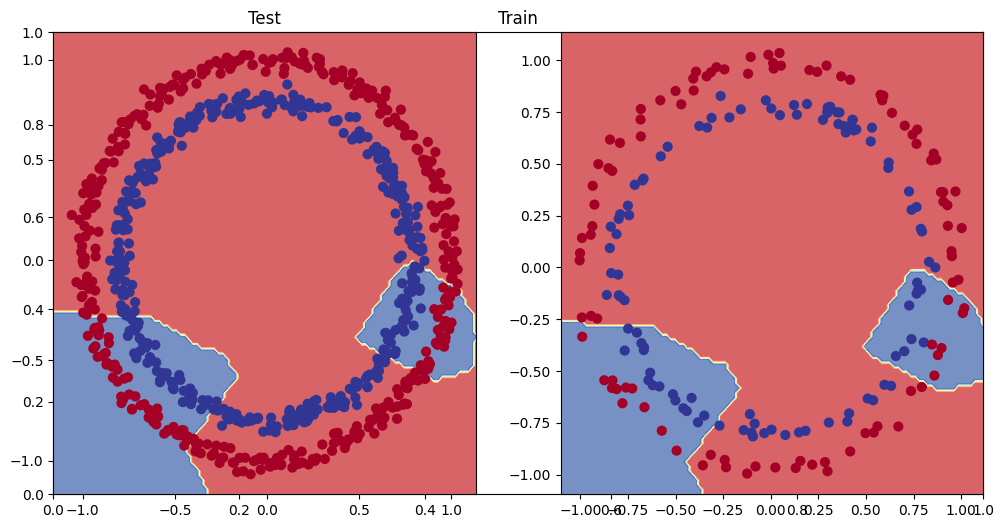

In [ ]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.title("Train")
plt.subplot(1,2,1)
plot_decision_boundary(model2,X_train,y_train)
plt.title("Test")
plt.subplot(1,2,2)
plot_decision_boundary(model2,X_test,y_test)

# Replicating non linear activation function

In [ ]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

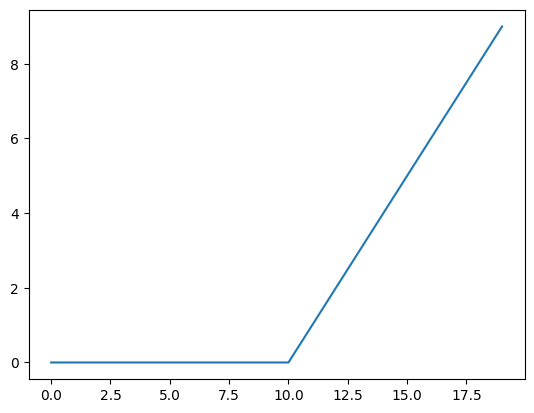

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

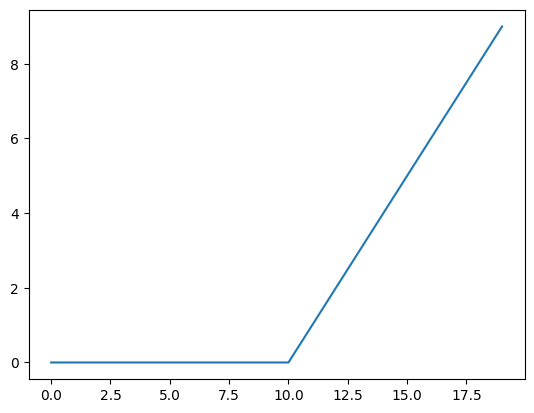

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return torch.div(torch.tensor(1),torch.add(torch.tensor(1),torch.exp(torch.negative(x))))

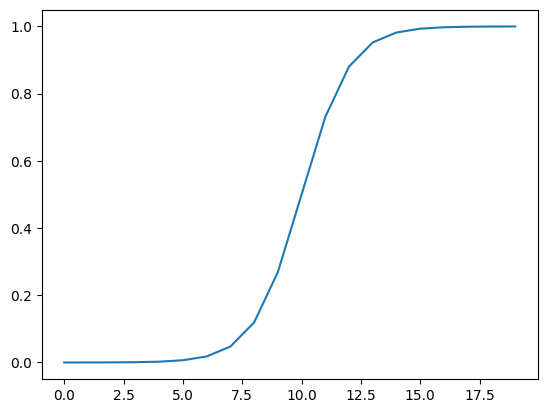

In [ ]:
plt.plot(sigmoid(A))

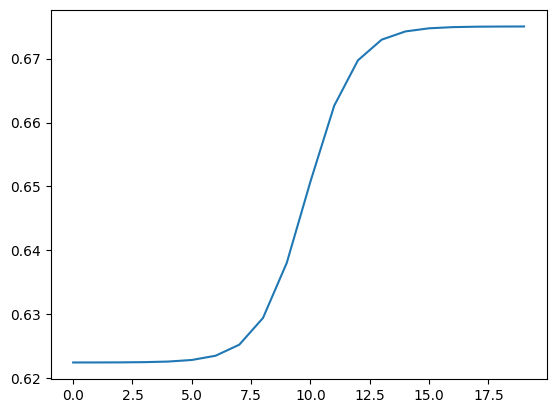

In [ ]:
plt.plot(torch.sigmoid(torch.sigmoid(torch.sigmoid(A))))

#Multi Class Classification

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


X_bob, y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)


X_blob = torch.from_numpy(X_bob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

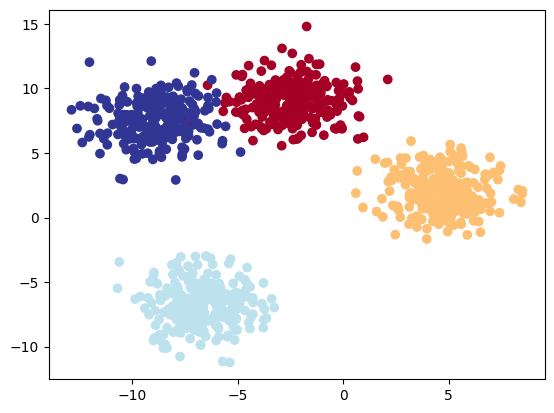

In [ ]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [ ]:
from collections.abc import ItemsView
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
class MulticlassClassifer(nn.Module):
  def __init__(self, input_features, ouput_features, hidden_units=8):
    super().__init__()
    self.linear_layers = nn.Sequential(
          nn.Linear(in_features=input_features,out_features=hidden_units),
          nn.Linear(in_features=hidden_units,out_features=hidden_units),
          nn.ReLU(),
          nn.Linear(in_features=hidden_units,out_features=ouput_features),
          nn.ReLU()
          )
  def forward(self,x):
    return self.linear_layers(x)

In [ ]:
model_cls = MulticlassClassifer(X_blob.shape[1],len(y_blob.unique())).to(device)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cls.parameters(),lr=0.1)

In [ ]:
model_cls(X_blob.to(device))

tensor([[0.3244, 0.0000, 0.1992, 0.0382],
        [0.7771, 0.0000, 0.3243, 0.0000],
        [0.8020, 0.0000, 0.3204, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.9237, 0.0000, 0.3594, 0.0000],
        [0.3170, 0.0000, 0.2156, 0.0445]], grad_fn=<ReluBackward0>)

In [ ]:
import torch
def training(model,X_train,y_train,X_test,y_test,epochs,loss_fn,optimizer):
  torch.cuda.manual_seed(42)
  torch.manual_seed(42)
  for epoch in range(epochs):
    model.train()
    train_logits = model(X_train)
    train_preds = torch.softmax(train_logits,1) # logits -> pred prob -> pred labels
    y_pred = torch.argmax(train_preds,1)
    train_loss = loss_fn(train_logits,y_train.to(device))
    train_acc = accuracy(y_train.to(device),y_pred)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test)
      test_preds = torch.softmax(test_logits,1) #
      test_loss = loss_fn(test_logits,y_test.to(device))

      y1_pred = torch.argmax(test_preds,1)
      test_acc = accuracy(y_test.to(device),y1_pred)
      if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss} | Accuracy: {train_acc:.2f} | Test Loss: {test_loss} | Test Acc: {test_acc}")
  return y_pred, y1_pred

In [ ]:
epochs = 1000

X_train = X_blob.to(device)
y_train = y_blob.to(device)
X_test = X_blob.to(device)
y_test = y_blob.to(device)

train_preds,test_preds = training(model_cls,X_train,y_train,X_test,y_test,epochs,loss_fn,optimizer)

Epoch: 0 | Loss: 1.4001967906951904 | Accuracy: 25.10 | Test Loss: 1.3220833539962769 | Test Acc: 25.8
Epoch: 100 | Loss: 0.5235359072685242 | Accuracy: 73.40 | Test Loss: 0.5220978856086731 | Test Acc: 73.5
Epoch: 200 | Loss: 0.4460657835006714 | Accuracy: 74.00 | Test Loss: 0.4456300437450409 | Test Acc: 74.0
Epoch: 300 | Loss: 0.3899182081222534 | Accuracy: 74.30 | Test Loss: 0.38925594091415405 | Test Acc: 74.3
Epoch: 400 | Loss: 0.37325921654701233 | Accuracy: 74.30 | Test Loss: 0.37322476506233215 | Test Acc: 74.3
Epoch: 500 | Loss: 0.3712058663368225 | Accuracy: 74.30 | Test Loss: 0.3711930811405182 | Test Acc: 74.3
Epoch: 600 | Loss: 0.3702380657196045 | Accuracy: 74.30 | Test Loss: 0.37023061513900757 | Test Acc: 74.3
Epoch: 700 | Loss: 0.3696092367172241 | Accuracy: 74.30 | Test Loss: 0.3696039021015167 | Test Acc: 74.3
Epoch: 800 | Loss: 0.3691357374191284 | Accuracy: 74.30 | Test Loss: 0.369131475687027 | Test Acc: 74.3
Epoch: 900 | Loss: 0.368745893239975 | Accuracy: 74.30

In [ ]:
train_preds[:5]

tensor([3, 2, 2, 0, 0])

In [ ]:
torch.sum(train_preds[0])

tensor(3)

In [ ]:
torch.argmax(test_preds[0])

tensor(0)

In [ ]:
model_cls.eval()
with torch.inference_mode():
  test_logits = model_cls(X_test)
  test_preds = torch.softmax(test_logits,1)
  test_loss = loss_fn(test_logits,y_test.to(device))
  test_acc = torchmetrics.Accuracy(task="multiclass",num_classes=4)(test_preds,y_test.to(device))
  print(f"Test Loss: {test_loss} | Test Acc: {test_acc}")


Test Loss: 0.3684203624725342 | Test Acc: 0.7429999709129333


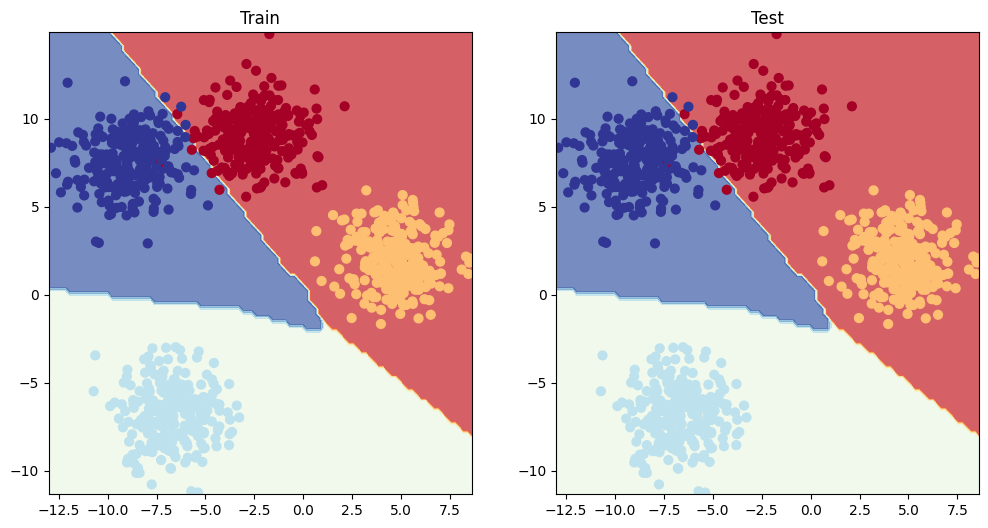

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_cls,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_cls,X_test,y_test)

In [ ]:
!pip install torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.6 MB/s eta 0:00:00
